# Apply Scenario Discovery

In [61]:
from ema_workbench import RealParameter, ScalarOutcome, Constant, Model

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from problem_formulation import get_model_for_problem_formulation

dike_model, planning_steps = get_model_for_problem_formulation(3)

In [62]:
from ema_workbench import MultiprocessingEvaluator, ema_logging, perform_experiments

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [63]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=500, policies=4)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 500 scenarios * 4 policies * 1 model(s) = 2000 experiments
100%|██████████████████████████████████████| 2000/2000 [03:58<00:00,  8.39it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [64]:
results = experiments, outcomes

In [65]:
cleaned_experiments = experiments.drop(labels=[l.name for l in dike_model.levers], axis=1)

### Create figure for total costs of A5

In [66]:
from ema_workbench.analysis import prim

data = outcomes['A.5 Total Costs']
print(data)

y = data < np.percentile(data, 10)

prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.8)
box1 = prim_alg.find_box()

[1.43505749e+08 1.43505749e+08 1.43505749e+08 ... 1.23434666e+08
 1.23434666e+08 1.23660505e+08]


AssertionError: 

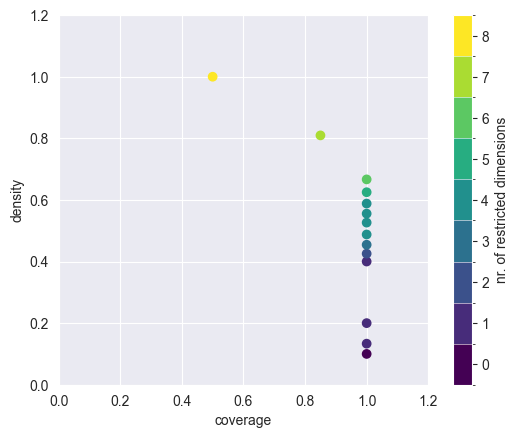

In [67]:
box1.show_tradeoff()
plt.show()

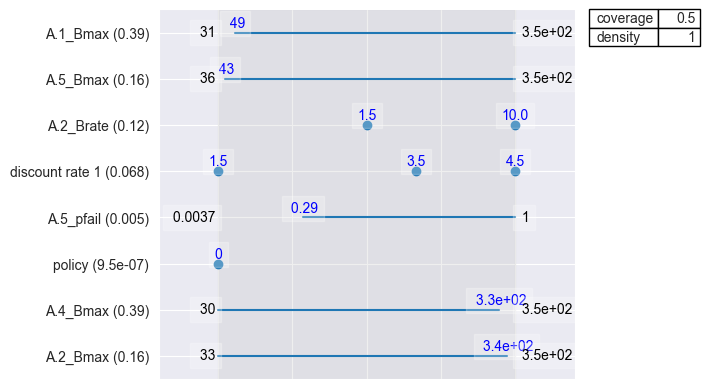

In [68]:
box1.inspect(style='graph')
plt.show()

### Create figure for evacuation costs

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 2000 points remaining, containing 863 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.25, coverage: 0.5793742757821553, density: 1.0 restricted_dimensions: 1


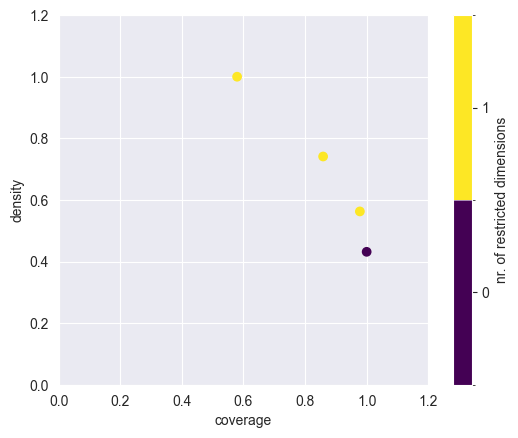

In [69]:
from ema_workbench.analysis import prim

x = cleaned_experiments
y = outcomes["Expected Evacuation Costs"] < 0.8
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

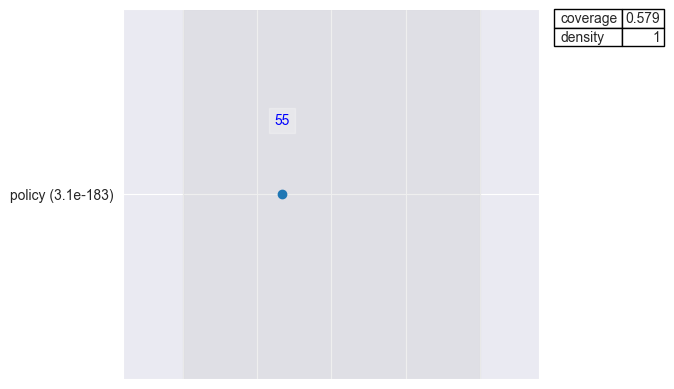

In [70]:
box1.inspect(style='graph')
plt.show()

### Create figure for expected number of deaths A5

In [71]:
from ema_workbench.analysis import prim

x = cleaned_experiments
y = outcomes["A.5_Expected Number of Deaths"] < 0.8
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

AssertionError: 

## Dimensional plot

In [72]:

from ema_workbench.analysis import dimensional_stacking

[MainProcess/INFO] model dropped from analysis because only a single category


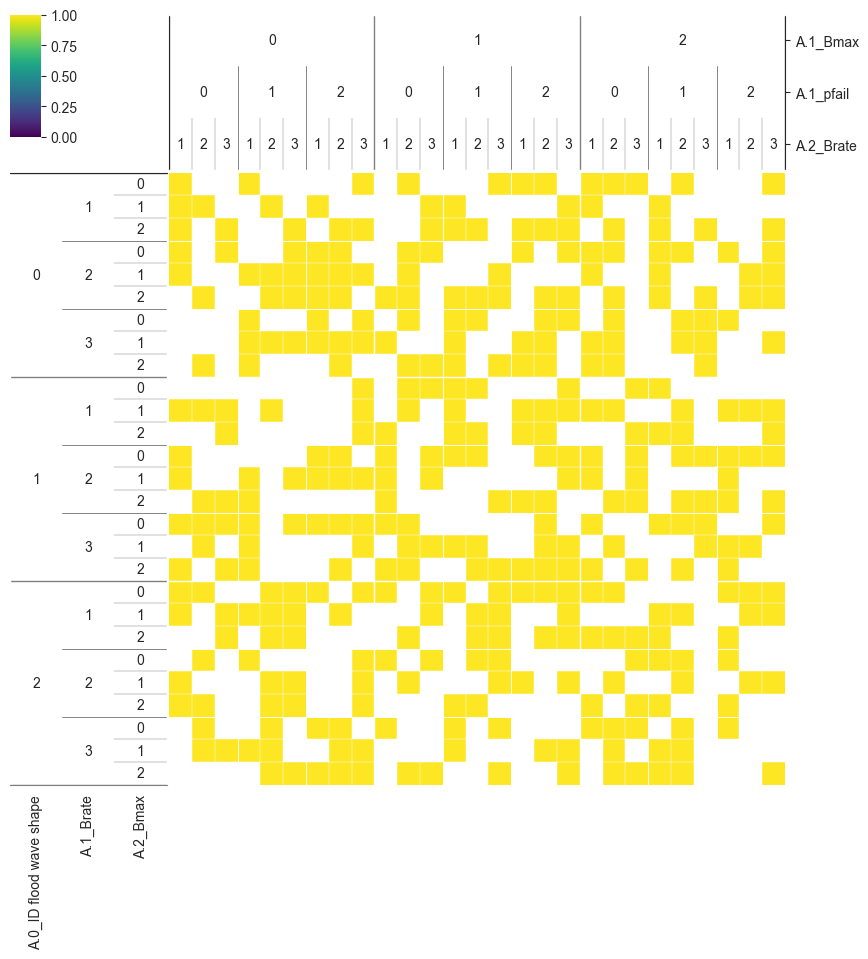

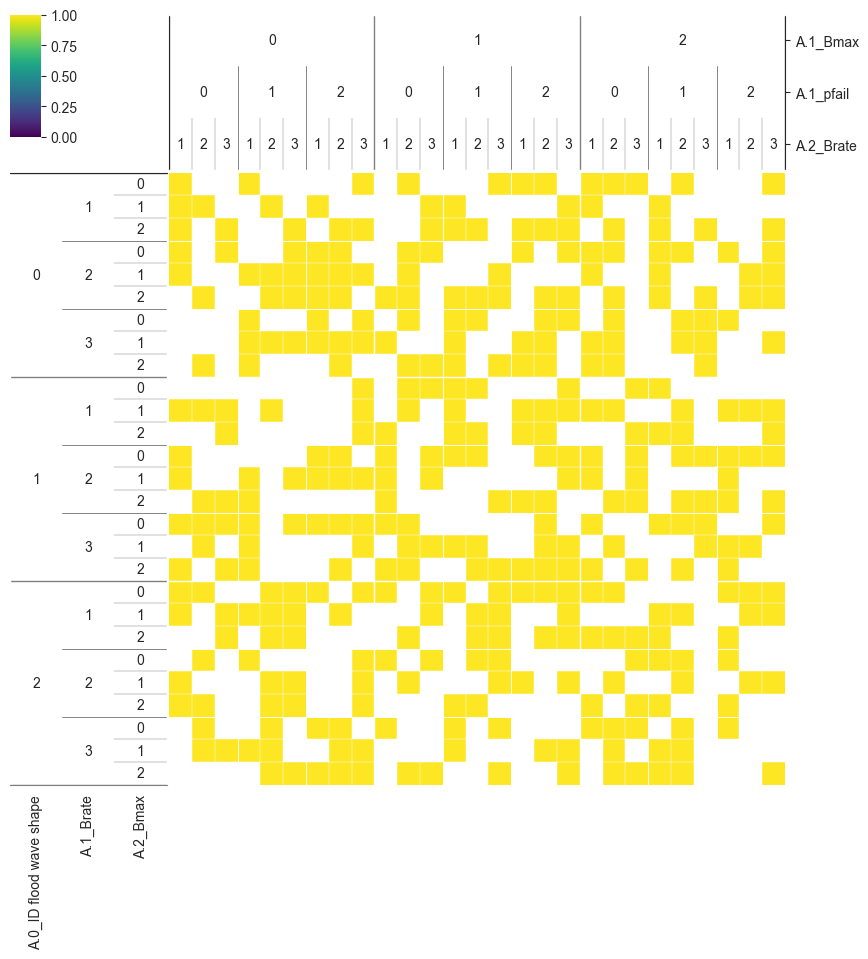

In [73]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)